In [1]:
# <-- Import libraries, custom functions, and load configuration & datasets <--

import yaml

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re

# <-- Imports custom preprocessing functions from 'functions.py' <--

from functions import (drop_duplicates,
                       concat_dataframes,
                       remove_all_punctuation,
                       drop_irrelevant_columns,
                       standardize_column_names,
                       filter_by_regex_pattern,
                       standardize_dates
                       )

# <-- Loads YAML configuration to dynamically reference CSV output files. <--

config = None  # <-- Initialize config
try:
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("Yaml configuration file not found!")
config

df_other = pd.read_csv(config['output_data']['file1'])
df_data_analyst = pd.read_csv(config['output_data']['file2'])
df_keywords = pd.read_csv(config['output_data']['file3'])


In [2]:
# Display df_merged DataFrame structure and summary
df_other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2587 entries, 0 to 2586
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_id             2587 non-null   int64  
 1   agency             2587 non-null   object 
 2   #_of_positions     2587 non-null   int64  
 3   business_title     2587 non-null   object 
 4   level              2587 non-null   object 
 5   job_category       2587 non-null   object 
 6   career_level       2587 non-null   object 
 7   salary_range_from  2587 non-null   float64
 8   salary_range_to    2587 non-null   float64
 9   salary_frequency   2587 non-null   object 
 10  preferred_skills   684 non-null    object 
 11  posting_date       1002 non-null   object 
 12  post_until         1156 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 262.9+ KB


In [3]:
# Display df_data_analyst DataFrame structure and summary
df_data_analyst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_id             73 non-null     int64  
 1   agency             73 non-null     object 
 2   #_of_positions     73 non-null     int64  
 3   business_title     73 non-null     object 
 4   level              73 non-null     object 
 5   job_category       73 non-null     object 
 6   career_level       73 non-null     object 
 7   salary_range_from  73 non-null     float64
 8   salary_range_to    73 non-null     float64
 9   salary_frequency   73 non-null     object 
 10  preferred_skills   40 non-null     object 
 11  posting_date       32 non-null     object 
 12  post_until         51 non-null     object 
dtypes: float64(2), int64(2), object(9)
memory usage: 7.5+ KB


In [4]:
# Display df_keywords DataFrame structure and summary
df_keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2649 entries, 0 to 2648
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   job_id             2649 non-null   int64  
 1   agency             2649 non-null   object 
 2   #_of_positions     2649 non-null   int64  
 3   business_title     2649 non-null   object 
 4   level              2649 non-null   object 
 5   job_category       2649 non-null   object 
 6   career_level       2649 non-null   object 
 7   salary_range_from  2649 non-null   float64
 8   salary_range_to    2649 non-null   float64
 9   salary_frequency   2649 non-null   object 
 10  preferred_skills   2649 non-null   object 
 11  posting_date       1026 non-null   object 
 12  post_until         814 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 269.2+ KB


In [5]:
# Apply standard date formatting to all DataFrames
data_frames = [df_keywords,df_data_analyst,df_other]
date_cols = ['posting_date', 'post_until']
for df in data_frames:
    df = standardize_dates(df,date_cols)

d:\vscode101\first_project\notebooks\functions.py:51: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)


In [6]:
# Inspect df_keywords after date standardization
df_keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2649 entries, 0 to 2648
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   job_id             2649 non-null   int64         
 1   agency             2649 non-null   object        
 2   #_of_positions     2649 non-null   int64         
 3   business_title     2649 non-null   object        
 4   level              2649 non-null   object        
 5   job_category       2649 non-null   object        
 6   career_level       2649 non-null   object        
 7   salary_range_from  2649 non-null   float64       
 8   salary_range_to    2649 non-null   float64       
 9   salary_frequency   2649 non-null   object        
 10  preferred_skills   2649 non-null   object        
 11  posting_date       1026 non-null   datetime64[ns]
 12  post_until         335 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(7)
memory us

In [7]:
# Conclusion
# With these plots, we are able to visually and quantitatively compare:

# Salary characteristics
# Posting frequency and trends
# Contract types
# Agency and job category distribution
# Career level
# Posting durations and openness

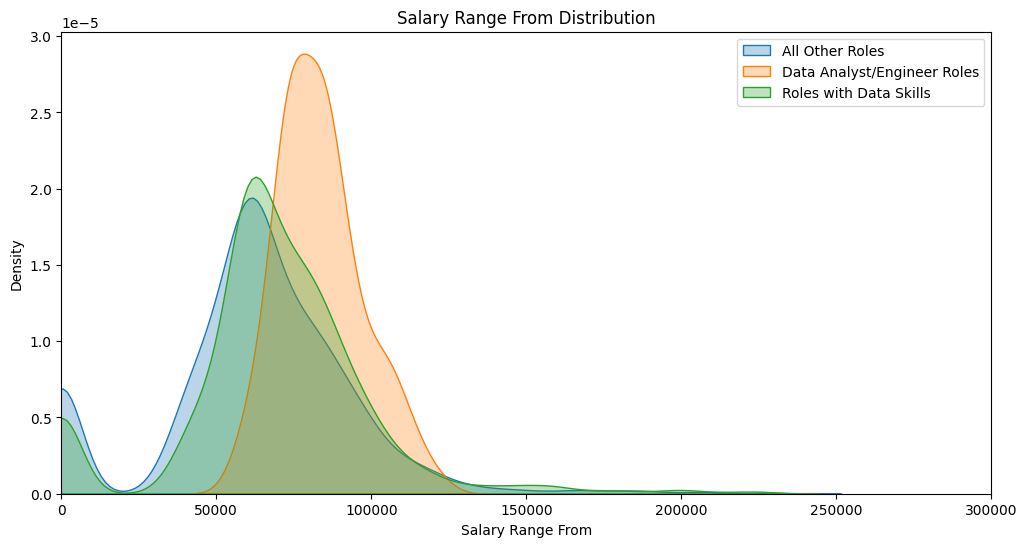

In [ ]:
# 1. Salary Distribution Comparison
# Insight:
# Data roles and jobs requiring modern data skills tend to have higher salary ranges than the general job population.

# What to look for:
# Are data roles and “preferred_skills” roles shifted higher than the general population?
# Are there outliers or salary bands unique to these groups?

# --> Visualize salary distributions across job groups
#
# - Plots kernel density estimates (KDE) for starting salary ranges across all jobs, data roles, and roles with data skills.
# - Reveals differences in salary bands and highlights whether data-centric roles command higher pay or exhibit unique outliers.
#
# How to read this chart:
# - Each curve shows the distribution of starting salaries for a group.
# - Peaks indicate the most common salary ranges; curves shifted right mean higher salaries.
# - Compare the three groups to see which roles typically offer higher or lower starting pay.

plt.figure(figsize=(12,6))
sns.kdeplot(df_other['salary_range_from'], label='All Other Roles', fill=True, alpha=0.3)
sns.kdeplot(df_data_analyst['salary_range_from'], label='Data Analyst/Engineer Roles', fill=True, alpha=0.3)
sns.kdeplot(df_keywords['salary_range_from'], label='Roles with Data Skills', fill=True, alpha=0.3)
plt.title('Salary Range From Distribution')
plt.xlabel('Salary Range From')
plt.xlim(0, 300000)
plt.legend()
plt.savefig("../figures/figure1.jpeg", dpi=600, format="jpg")
plt.show()

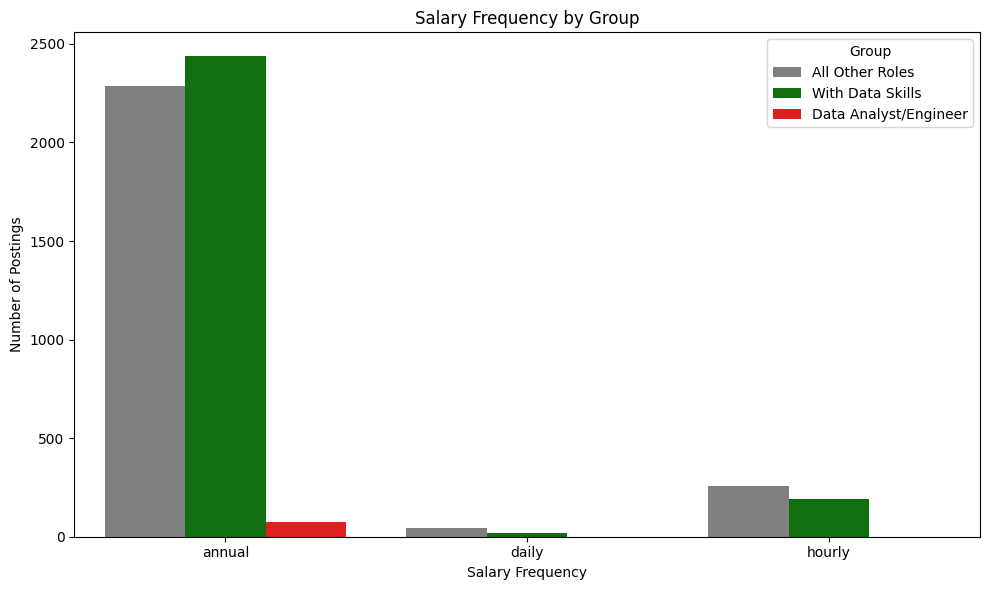

In [9]:
# 2. Salary Frequency by Group
# Insight:
# Jobs with data-centric titles or skills tend to be annual, not hourly.

# Are “Annual” contracts more frequent in data roles?
# Is “Hourly” rare?

# -- > Compare salary frequency (annual, hourly, etc.) by group
#
# - Uses overlaid count plots to compare how often roles in each group are annual, hourly, etc.
# - Assesses whether data-related jobs are more likely to be salaried versus contract/hourly.
#
# How to read this chart:
# - Each bar shows the number of postings in each pay frequency category (annual, hourly, etc.) for each group.
# - Taller bars mean more jobs of that pay type; overlapping colors reveal group differences.
# - Look for dominance of 'Annual' pay in data roles versus the general job population.


# Count salary frequency in each dataset
salary_other = df_other['salary_frequency'].value_counts()
salary_keywords = df_keywords['salary_frequency'].value_counts()
salary_data = df_data_analyst['salary_frequency'].value_counts()

# Combine into a single DataFrame
salary_counts = pd.DataFrame({
    'All Other Roles': salary_other,
    'With Data Skills': salary_keywords,
    'Data Analyst/Engineer': salary_data
}).fillna(0).astype(int)

# Reset index and rename columns
salary_counts = salary_counts.reset_index().rename(columns={'index': 'salary_frequency'})

# Melt into long format for seaborn
salary_melted = salary_counts.melt(id_vars='salary_frequency', var_name='Category', value_name='Count')

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=salary_melted,
    x='salary_frequency',
    y='Count',
    hue='Category',
    palette={
        'All Other Roles': 'gray',
        'With Data Skills': 'green',
        'Data Analyst/Engineer': 'red'
    }
)

# Final 
plt.title('Salary Frequency by Group')
plt.xlabel('Salary Frequency')
plt.ylabel('Number of Postings')
plt.legend(title='Group')
plt.tight_layout()
plt.show()

In [10]:


# plt.figure(figsize=(12,6))
# sns.histplot(df_other['posting_date'].dt.year.dropna(), label='All Roles', color='gray', alpha=0.4, bins=15)
# sns.histplot(df_keywords['posting_date'].dt.year.dropna(), label='With Data Skills', color='green', alpha=0.7, bins=15)
# sns.histplot(df_data_analyst['posting_date'].dt.year.dropna(), label='Data Analyst/Engineer', color='red', alpha=0.7, bins=15)
# plt.title('Job Postings Over Time')
# plt.xlabel('Year')
# plt.ylabel('Number of Postings')
# plt.legend()
# plt.show()

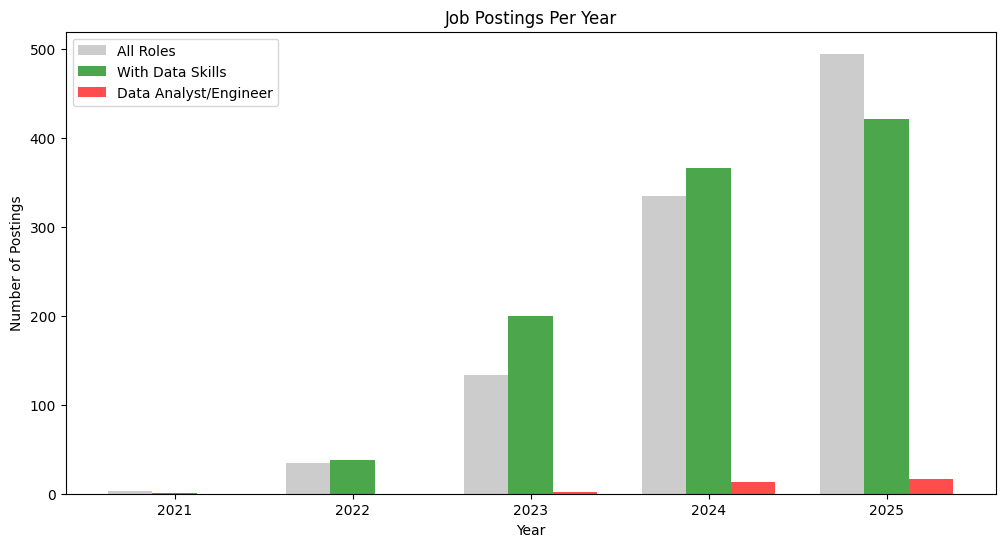

In [11]:
# 3. Job Posting Trends Over Time
# Insight:
# Are data-related jobs being posted more frequently in recent years?

# What to look for:
# Has there been an uptick in data-related roles?
# Are data jobs more “recent” in the overall dataset?

# -- > Show job posting trends over time by group
#
# - Plots histograms of job posting years for all jobs, data analyst/engineer roles, and data-skilled roles.
# - Used to detect whether demand for data talent is rising and if data jobs are more “recent”.
#
# How to read this chart:
# - The x-axis shows the number of job postings per year.
# - Each color represents a group; taller bars mean more postings in that year.
# - Compare when data jobs and all jobs were posted to see if data roles are a newer trend.

# Aggregate postings per year
all_roles_year = df_other['posting_date'].dt.year.value_counts().sort_index()
keywords_year = df_keywords['posting_date'].dt.year.value_counts().sort_index()
data_year = df_data_analyst['posting_date'].dt.year.value_counts().sort_index()

# Ensure years are integers and aligned
years = sorted(list(set(all_roles_year.index) | set(keywords_year.index) | set(data_year.index)))
all_roles = [all_roles_year.get(y, 0) for y in years]
keywords = [keywords_year.get(y, 0) for y in years]
data_jobs = [data_year.get(y, 0) for y in years]

# Plot side-by-side bars
width = 0.25
x = np.arange(len(years))

plt.figure(figsize=(12,6))
plt.bar(x - width, all_roles, width=width, color='gray', label='All Roles', alpha=0.4)
plt.bar(x, keywords, width=width, color='green', label='With Data Skills', alpha=0.7)
plt.bar(x + width, data_jobs, width=width, color='red', label='Data Analyst/Engineer', alpha=0.7)


plt.title('Job Postings Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Postings')
plt.xticks(x, [int(y) for y in years])
plt.legend()
plt.show()

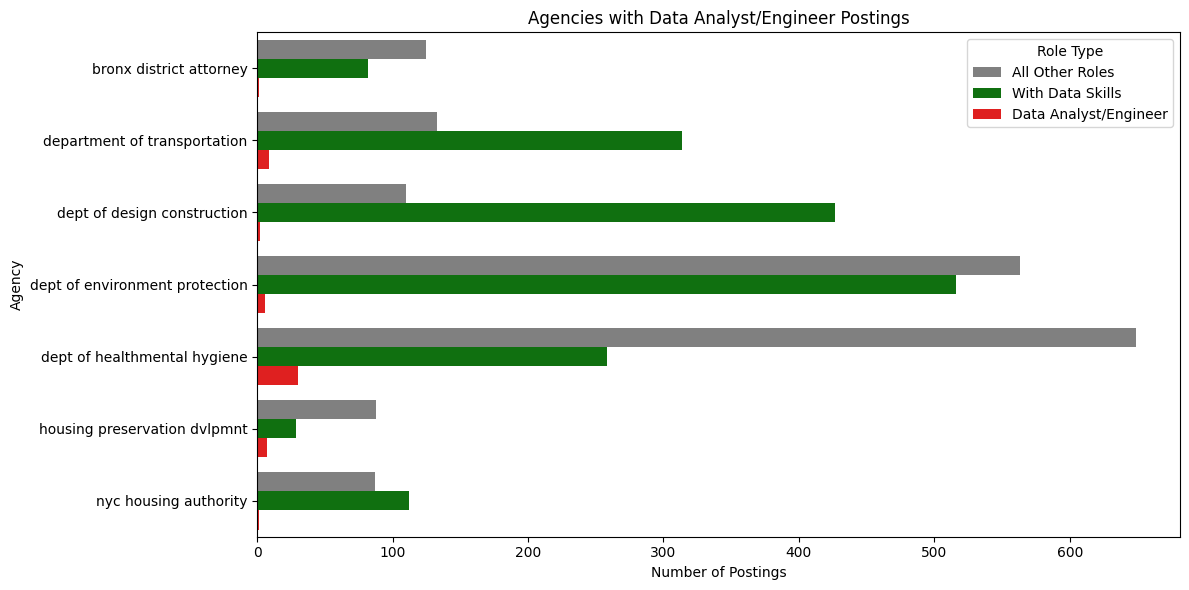

In [12]:
# 4. Distribution of Agencies by Group
# Insight:
# Are certain agencies more likely to offer data-related roles?

# What to look for:
# Are some agencies highly represented in data jobs?
# Do “data skills” jobs cluster in a few agencies?

# --> Compare the distribution of hiring agencies by group
#
# - Plots the most common agencies for all jobs, data analyst/engineer roles, and data-skilled roles.
# - Helps identify which agencies are most active in hiring for data-related positions versus the general market.
#
# How to read this chart:
# - Each bar (or segment in a count plot) represents an agency, with height proportional to the number of postings.
# - Compare the top agencies across groups to spot specialization or concentration in data hiring.
# - A few dominant agencies in data roles may suggest specialized recruiters or public sector trends.


# Find top 10 agencies 
top_agencies = df_other['agency'].value_counts().head(10).index

# Count postings for each group
all_roles = df_other[df_other['agency'].isin(top_agencies)]['agency'].value_counts()
with_data = df_keywords[df_keywords['agency'].isin(top_agencies)]['agency'].value_counts()
data_jobs = df_data_analyst[df_data_analyst['agency'].isin(top_agencies)]['agency'].value_counts()

# Combine into one DataFrame
agency_counts = pd.DataFrame({
    'All Other Roles': all_roles,
    'With Data Skills': with_data,
    'Data Analyst/Engineer': data_jobs
}).fillna(0).astype(int)

# Filter: keep only agencies with at least 1 data job
agency_counts = agency_counts[agency_counts['Data Analyst/Engineer'] > 0]

# Reset index and melt for seaborn
agency_counts = agency_counts.reset_index().rename(columns={'index': 'agency'})
agency_melted = agency_counts.melt(id_vars='agency', var_name='Category', value_name='Count')

# Plot side-by-side horizontal bars
plt.figure(figsize=(12, 6))
sns.barplot(
    data=agency_melted,
    y='agency',
    x='Count',
    hue='Category',
    palette={
        'All Other Roles': 'gray',
        'With Data Skills': 'green',
        'Data Analyst/Engineer': 'red'
    }
)

plt.title('Agencies with Data Analyst/Engineer Postings')
plt.xlabel('Number of Postings')
plt.ylabel('Agency')
plt.legend(title='Role Type')
plt.tight_layout()
plt.show()

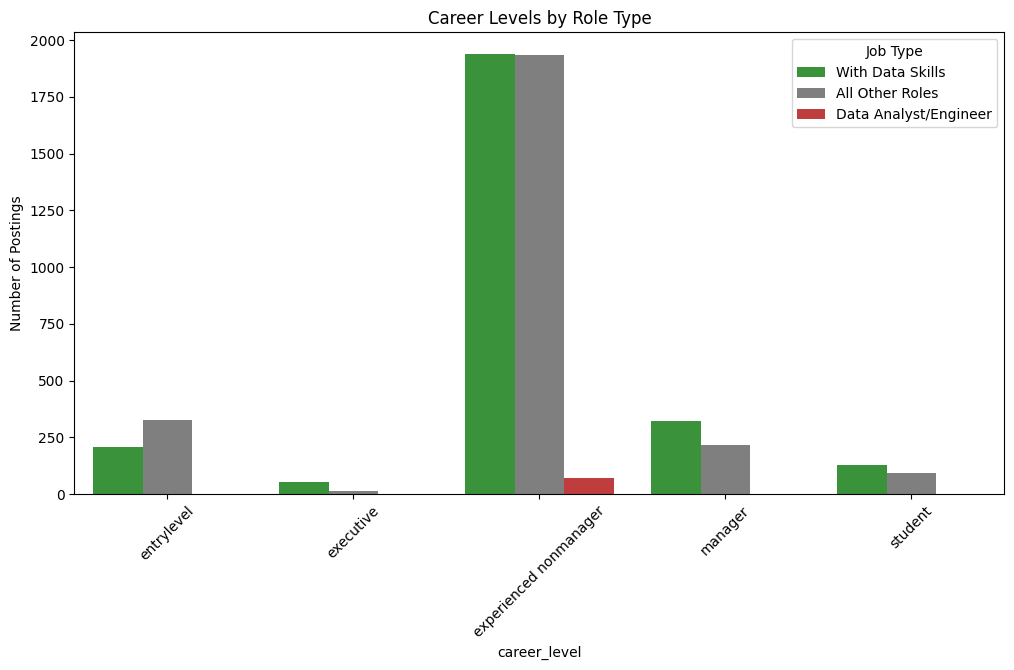

In [13]:
# 5. Career Level Comparison
# Insight:
# Data roles may require higher or more specialized career levels.

# What to look for:
# Are “Manager” or “Experienced” levels overrepresented in data jobs?

# --> Visualize career level distribution by job group
#
# - Compares the prevalence of different career levels (Entry, Mid, Senior, etc.) in each group.
# - Useful for assessing whether data roles skew more junior, senior, or mirror general trends.
#
# How to read this chart:
# - Each bar shows how many postings fall into each career level for a given group.
# - Taller bars mean more jobs at that level; compare group colors to see if data roles tend to require more experience.
# - Look for over- or under-representation at certain levels among data jobs.


#Count each career_level for all three DataFrames
counts_keywords = df_keywords['career_level'].value_counts()
counts_other = df_other['career_level'].value_counts()
counts_data = df_data_analyst['career_level'].value_counts()

#Combine them into a single DataFrame
career_df = pd.DataFrame({
    'With Data Skills': counts_keywords,
    'All Other Roles': counts_other,
    'Data Analyst/Engineer': counts_data
}).fillna(0).astype(int)

#Reset index for plotting
career_df = career_df.reset_index().rename(columns={'index': 'career_level'})

#Melt the DataFrame for seaborn
career_melted = career_df.melt(id_vars='career_level', var_name='Category', value_name='Count')

#Plot as grouped bar chart

custom_colors = ['#2ca02c', '#7f7f7f', '#d62728']  # green, gray, red

plt.figure(figsize=(12,6))
sns.barplot(
    data=career_melted,
    x='career_level',
    y='Count',
    hue='Category',
    palette=custom_colors
)
plt.title('Career Levels by Role Type')
plt.xticks(rotation=45)
plt.ylabel('Number of Postings')
plt.legend(title='Job Type')
plt.show()


# the old code for this chart
# plt.figure(figsize=(10,5))
# sns.countplot(x='career_level', data=df_keywords, color='green', label='With Data Skills')
# sns.countplot(x='career_level', data=df_other, color='gray', alpha=0.6, label='All Roles', order=df_other['career_level'].value_counts().index)
# sns.countplot(x='career_level', data=df_data_analyst, color='red', alpha=1, label='Data Analyst/Engineer')
# plt.title('Career Levels by Role Type')
# plt.xticks(rotation=45)
# plt.legend()
# plt.show()

In [14]:
print(career_melted['Category'].unique())

['With Data Skills' 'All Other Roles' 'Data Analyst/Engineer']


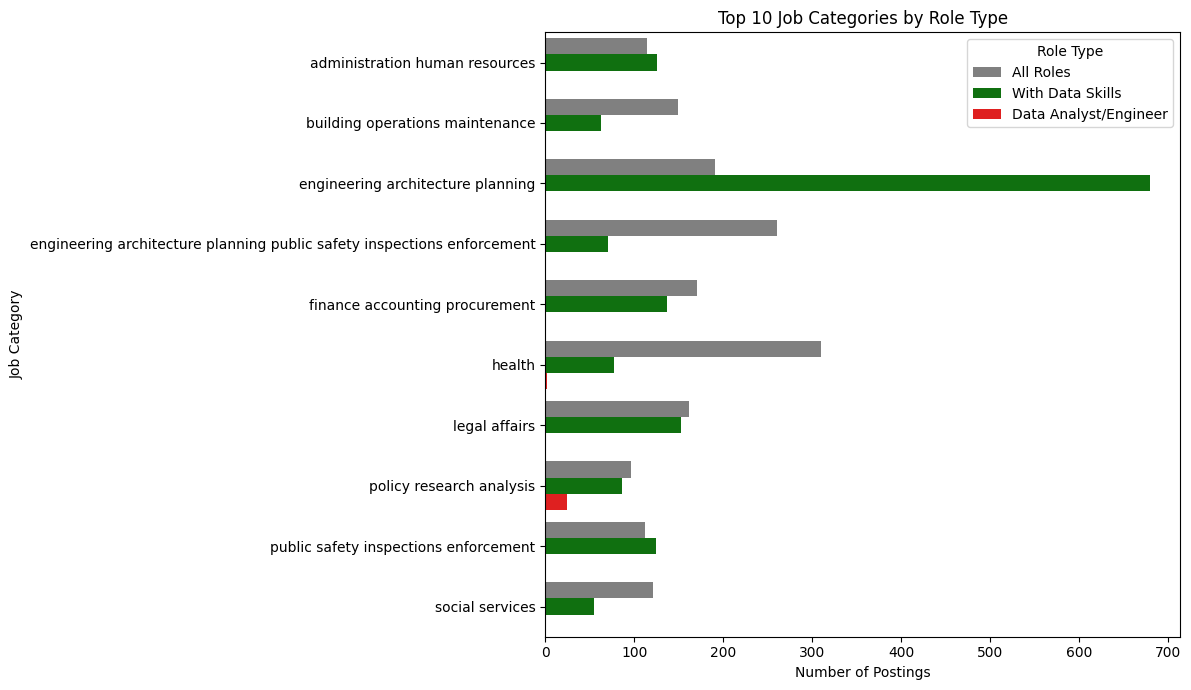

In [15]:
# 6. Job Category Comparison
# Insight:
# Are data jobs concentrated in certain job categories (e.g., IT, Planning, Research)?

# What to look for:
# Which job categories are most common for data-related roles?

# --> Compare job category (department) distributions by group
#
# - Plots the most frequent job categories (departments) for all jobs and for data-related roles.
# - Reveals whether data jobs are concentrated in specific fields or spread across the different departments.
#
# How to read this chart:
# - Each bar represents a job category; bar length shows the number of postings in that category.
# - Compare between groups: data jobs might cluster in IT, Research, or Planning, whereas general jobs may be spread out.
# - Outliers can highlight unique domains hiring for data roles.


# Get top 10 categories
top_job_cats = df_other['job_category'].value_counts().head(10).index

# Count jobs for each group
all_roles = df_other[df_other['job_category'].isin(top_job_cats)]['job_category'].value_counts()
with_data = df_keywords[df_keywords['job_category'].isin(top_job_cats)]['job_category'].value_counts()
data_jobs = df_data_analyst[df_data_analyst['job_category'].isin(top_job_cats)]['job_category'].value_counts()

# Combine into one DataFrame
job_counts = pd.DataFrame({
    'All Roles': all_roles,
    'With Data Skills': with_data,
    'Data Analyst/Engineer': data_jobs
}).fillna(0).astype(int)

# Reset index and melt
job_counts = job_counts.reset_index().rename(columns={'index': 'job_category'})
job_melted = job_counts.melt(id_vars='job_category', var_name='Category', value_name='Count')

# Plot horizontal grouped bars
plt.figure(figsize=(12, 7))
sns.barplot(
    data=job_melted,
    y='job_category',         # category axis
    x='Count',                # value axis
    hue='Category', 
    palette={'All Roles': 'gray', 'With Data Skills': 'green', 'Data Analyst/Engineer': 'red'}
)

plt.title("Top 10 Job Categories by Role Type")
plt.xlabel("Number of Postings")
plt.ylabel("Job Category")
plt.legend(title="Role Type")
plt.tight_layout()
plt.show()

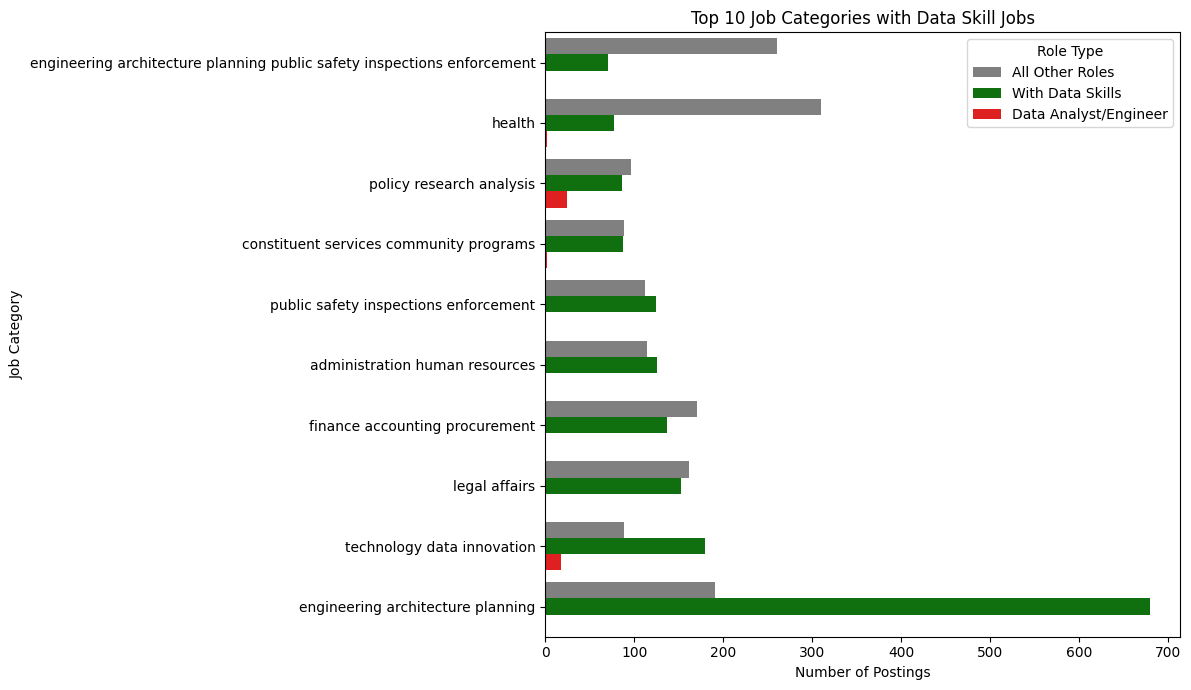

In [16]:
# 1️⃣ Get top 10 categories **based on With Data Skills (df_keywords)**
top_job_cats = df_keywords['job_category'].value_counts().head(10).index

# 2️⃣ Count jobs for each group (only in those categories)
all_roles = df_other[df_other['job_category'].isin(top_job_cats)]['job_category'].value_counts()
with_data = df_keywords[df_keywords['job_category'].isin(top_job_cats)]['job_category'].value_counts()
data_jobs = df_data_analyst[df_data_analyst['job_category'].isin(top_job_cats)]['job_category'].value_counts()

# 3️⃣ Combine into one DataFrame
job_counts = pd.DataFrame({
    'All Other Roles': all_roles,
    'With Data Skills': with_data,
    'Data Analyst/Engineer': data_jobs
}).fillna(0).astype(int)

job_counts = job_counts.sort_values(by='With Data Skills', ascending=True)


# 4️⃣ Reset index and melt
job_counts = job_counts.reset_index().rename(columns={'index': 'job_category'})
job_melted = job_counts.melt(id_vars='job_category', var_name='Category', value_name='Count')

# 5️⃣ Plot horizontal grouped bars
plt.figure(figsize=(12, 7))
sns.barplot(
    data=job_melted,
    y='job_category',         # category axis
    x='Count',                # value axis
    hue='Category',
    palette={
        'All Other Roles': 'gray',
        'With Data Skills': 'green',
        'Data Analyst/Engineer': 'red'
    }
)

plt.title("Top 10 Job Categories with Data Skill Jobs")
plt.xlabel("Number of Postings")
plt.ylabel("Job Category")
plt.legend(title="Role Type")
plt.tight_layout()
plt.show()

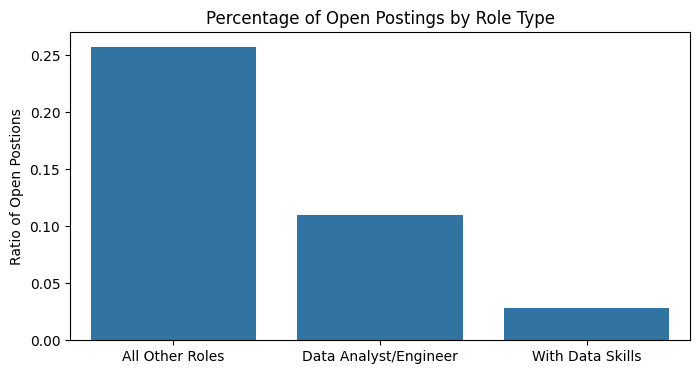

In [17]:
# 7. Open vs Expired Postings
# Insight:
# Are data jobs open for longer or more likely to still be open?

# What to look for:
# Are a greater percentage of data roles still open?

# -- > Compare the status (open vs expired) of job postings by group
#
# - Uses a count plot or pie chart to show the proportion of currently open vs expired job postings in each group.
# - Helps understand if data roles stay open longer, or if they fill/expire faster than typical jobs.
#
# How to read this chart:
# - Each bar (or pie slice) shows the number or proportion of jobs still open versus expired.
# - Compare across groups to see if data jobs are harder to fill (more open) or more quickly filled (fewer open).

import datetime as dt

today = pd.Timestamp(dt.datetime.now())
for df in [df_other, df_data_analyst, df_keywords]:
    df['is_open'] = df['post_until'] > today

plt.figure(figsize=(8,4))
sns.barplot(x=['All Other Roles','Data Analyst/Engineer','With Data Skills'],
            y=[df_other['is_open'].mean(), df_data_analyst['is_open'].mean(), df_keywords['is_open'].mean()])
plt.title('Percentage of Open Postings by Role Type')
plt.ylabel('Ratio of Open Postions')
plt.show()

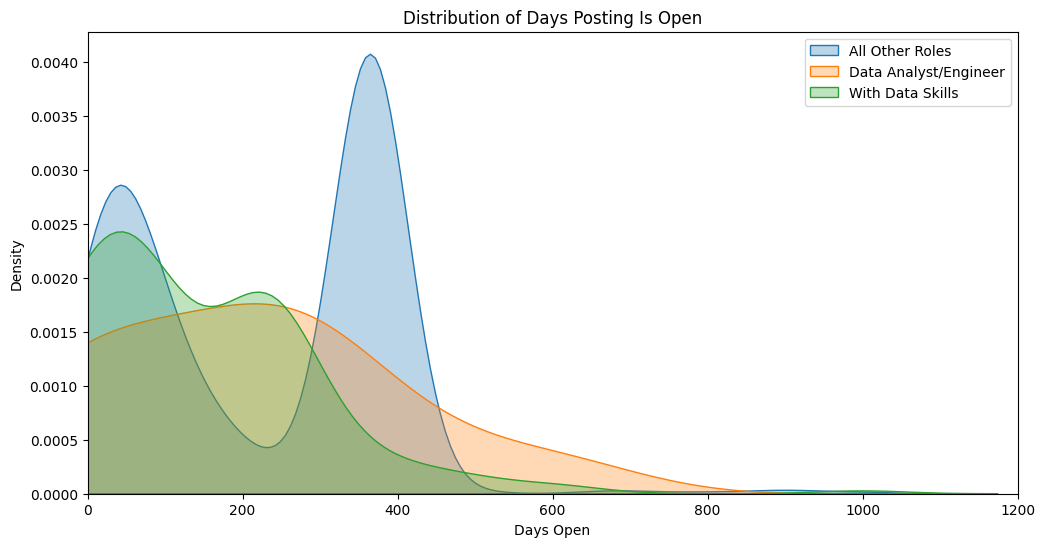

In [18]:
# 8. Days Posting is Open
# Insight:
# Do data roles stay posted longer or shorter than the general population?

# What to look for:
# Are data roles posted for longer or shorter periods?

# --> Plot the distribution of days each posting was open by group
#
# - Shows the number of days a job remained posted (from posting to expiration/closing).
# - Highlights differences in hiring speed or demand for data roles versus the general job market.
#
# How to read this chart:
# - The x-axis shows how many days postings were open; the y-axis shows the frequency.
# - Compare group curves: a curve shifted right means jobs stay open longer; left means quicker filling.
# - Outliers or long tails suggest hard-to-fill roles.

for df in [df_other, df_data_analyst, df_keywords]:
    df['days_open'] = (df['post_until'] - df['posting_date']).dt.days

plt.figure(figsize=(12,6))
sns.kdeplot(df_other['days_open'].dropna(), label='All Other Roles', fill=True, alpha=0.3)
sns.kdeplot(df_data_analyst['days_open'].dropna(), label='Data Analyst/Engineer', fill=True, alpha=0.3)
sns.kdeplot(df_keywords['days_open'].dropna(), label='With Data Skills', fill=True, alpha=0.3)
plt.title('Distribution of Days Posting Is Open')
plt.xlabel('Days Open')
plt.xlim(0, 1200)
plt.legend()
plt.show()

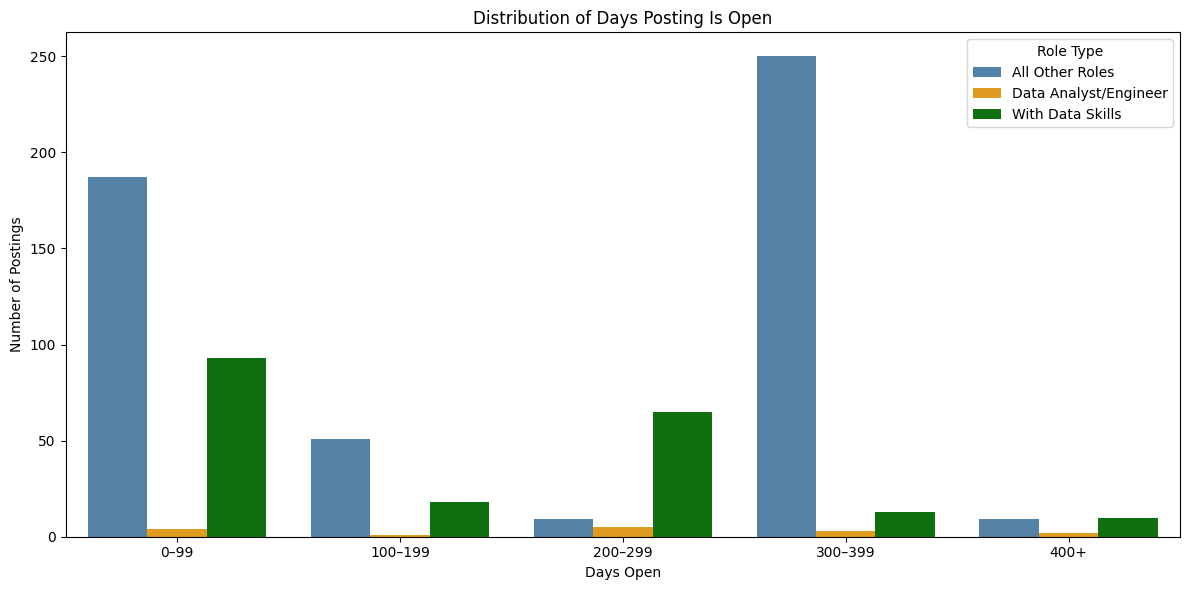

In [19]:
# Calculate days_open
for df in [df_other, df_data_analyst, df_keywords]:
    df['days_open'] = (df['post_until'] - df['posting_date']).dt.days

# Define bins and labels (note: 6 edges for 5 labels)
bins = [0, 100, 200, 300, 400, 10000]
labels = ["0–99", "100–199", "200–299", "300–399", "400+"]

# Categorize into bins
df_other['days_bin'] = pd.cut(df_other['days_open'], bins=bins, labels=labels, include_lowest=True, right=False)
df_data_analyst['days_bin'] = pd.cut(df_data_analyst['days_open'], bins=bins, labels=labels, include_lowest=True, right=False)
df_keywords['days_bin'] = pd.cut(df_keywords['days_open'], bins=bins, labels=labels, include_lowest=True, right=False)

# Count postings per bin
other_counts = df_other['days_bin'].value_counts().reindex(labels, fill_value=0)
data_counts = df_data_analyst['days_bin'].value_counts().reindex(labels, fill_value=0)
keywords_counts = df_keywords['days_bin'].value_counts().reindex(labels, fill_value=0)

# Combine into a single DataFrame
dist_df = pd.DataFrame({
    'Days Range': labels,
    'All Other Roles': other_counts.values,
    'Data Analyst/Engineer': data_counts.values,
    'With Data Skills': keywords_counts.values
})

# Melt for seaborn
dist_melted = dist_df.melt(id_vars='Days Range', var_name='Category', value_name='Count')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=dist_melted,
    x='Days Range',
    y='Count',
    hue='Category',
    palette={
        'All Other Roles': 'steelblue',
        'Data Analyst/Engineer': 'orange',
        'With Data Skills': 'green'
    }
)

plt.title('Distribution of Days Posting Is Open')
plt.xlabel('Days Open')
plt.ylabel('Number of Postings')
plt.legend(title='Role Type')
plt.tight_layout()
plt.show()